## Learning Outcomes
- Exploratory data analysis & preparing the data for model building. 
- Machine Learning - Supervised Learning Classification
  - Logistic Regression
  - Naive bayes Classifier
  - KNN Classifier
  - Decision Tree Classifier
  - Random Forest Classifier
  - Ensemble methods
- Training and making predictions using different classification models.
- Model evaluation

## Objective: 
- The Classification goal is to predict “heart disease” in a person with regards to different factors given. 

## Context:
- Heart disease is one of the leading causes of death for people of most races in the US. At least 1 of 3 key risk factors for heart disease: high blood pressure, high cholesterol, and smoking. 
- Detecting and preventing the factors that have the greatest impact on heart disease is very important in healthcare. Machine learning methods may detect "patterns" from the data and can predict whether a patient is suffering from any heart disease or not..

## Dataset Information

#### Source: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease?datasetId=1936563&sortBy=voteCount
Originally, the dataset come from the CDC and is a major part of the Behavioral Risk Factor Surveillance System (BRFSS), which conducts annual telephone surveys to gather data on the health status of U.S. residents. 

This dataset consists of eighteen columns
- HeartDisease: Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)
- BMI: Body Mass Index (BMI)
- Smoking: smoked at least 100 cigarettes in your entire life
- AlcoholDrinking: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week
- Stroke:Ever had a stroke?
- PhysicalHealth: physical health, which includes physical illness and injury
- MentalHealth: for how many days during the past 30 days was your mental health not good?
- DiffWalking: Do you have serious difficulty walking or climbing stairs?
- Sex: male or female?
- AgeCategory: Fourteen-level age category
- Race: Imputed race/ethnicity value
- Diabetic: diabetes?
- PhysicalActivity: Adults who reported doing physical activity or exercise during the past 30 days other than their regular job
- GenHealth: Would you say that in general your health is good, fine or excellent?
- SleepTime: On average, how many hours of sleep do you get in a 24-hour period?
- Asthma: you had asthma?
- KidneyDisease: Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?
- SkinCancer: Ever had skin cancer?

### 1. Importing Libraries

In [7]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 
# Numerical libraries
import numpy as np   

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

In [32]:
pwd

'D:\\padhai\\kaggle\\lab3'

### 2. Load the dataset and display a sample of five rows of the data frame.

In [8]:
# reading the CSV file into pandas dataframe
heart_df = pd.read_csv("heart_2020_cleaned.csv")
heart_df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


### 3. Check the shape of the data (number of rows and columns). Check the general information about the dataframe using the .info() method.

In [9]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [10]:
heart_df.shape

(319795, 18)

### 4. Check the statistical summary of the dataset and write your inferences.

In [11]:
heart_df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [12]:
heart_df.describe(include="O")

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
count,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795
unique,2,2,2,2,2,2,13,6,4,2,5,2,2,2
top,No,No,No,No,No,Female,65-69,White,No,Yes,Very good,No,No,No
freq,292422,187887,298018,307726,275385,167805,34151,245212,269653,247957,113858,276923,308016,289976


### 5. Check the percentage of missing values in each column of the data frame. Drop the missing values if there are any.

In [13]:
percent= 100*(len(heart_df.loc[:,heart_df.isnull().sum(axis=0)>=1 ].index) / len(heart_df.index))
print(round(percent,2))
#100 shows that it has no missing values

100.0


### 6. Check if there are any duplicate rows. If any drop them and check the shape of the dataframe after dropping duplicates.

In [14]:
len(heart_df[heart_df.duplicated()])


18078

In [15]:
heart_df.drop_duplicates(inplace=True)

In [16]:
len(heart_df[heart_df.duplicated()])

0

### 7. Check the distribution of the target variable (i.e. 'HeartDisease') and write your observations.

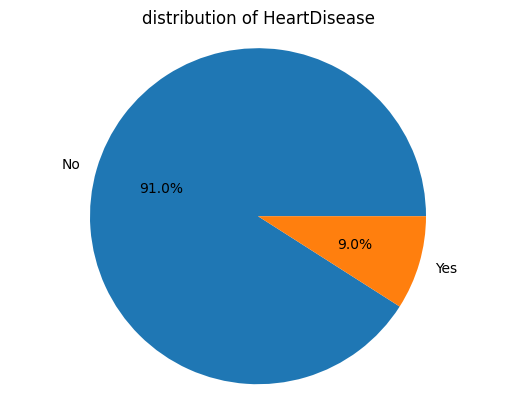

In [17]:

counts = heart_df['HeartDisease'].value_counts()

plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('distribution of HeartDisease')
plt.show()

### 8. Visualize the distribution of the target column 'Heart disease' with respect to various categorical features and write your observations.

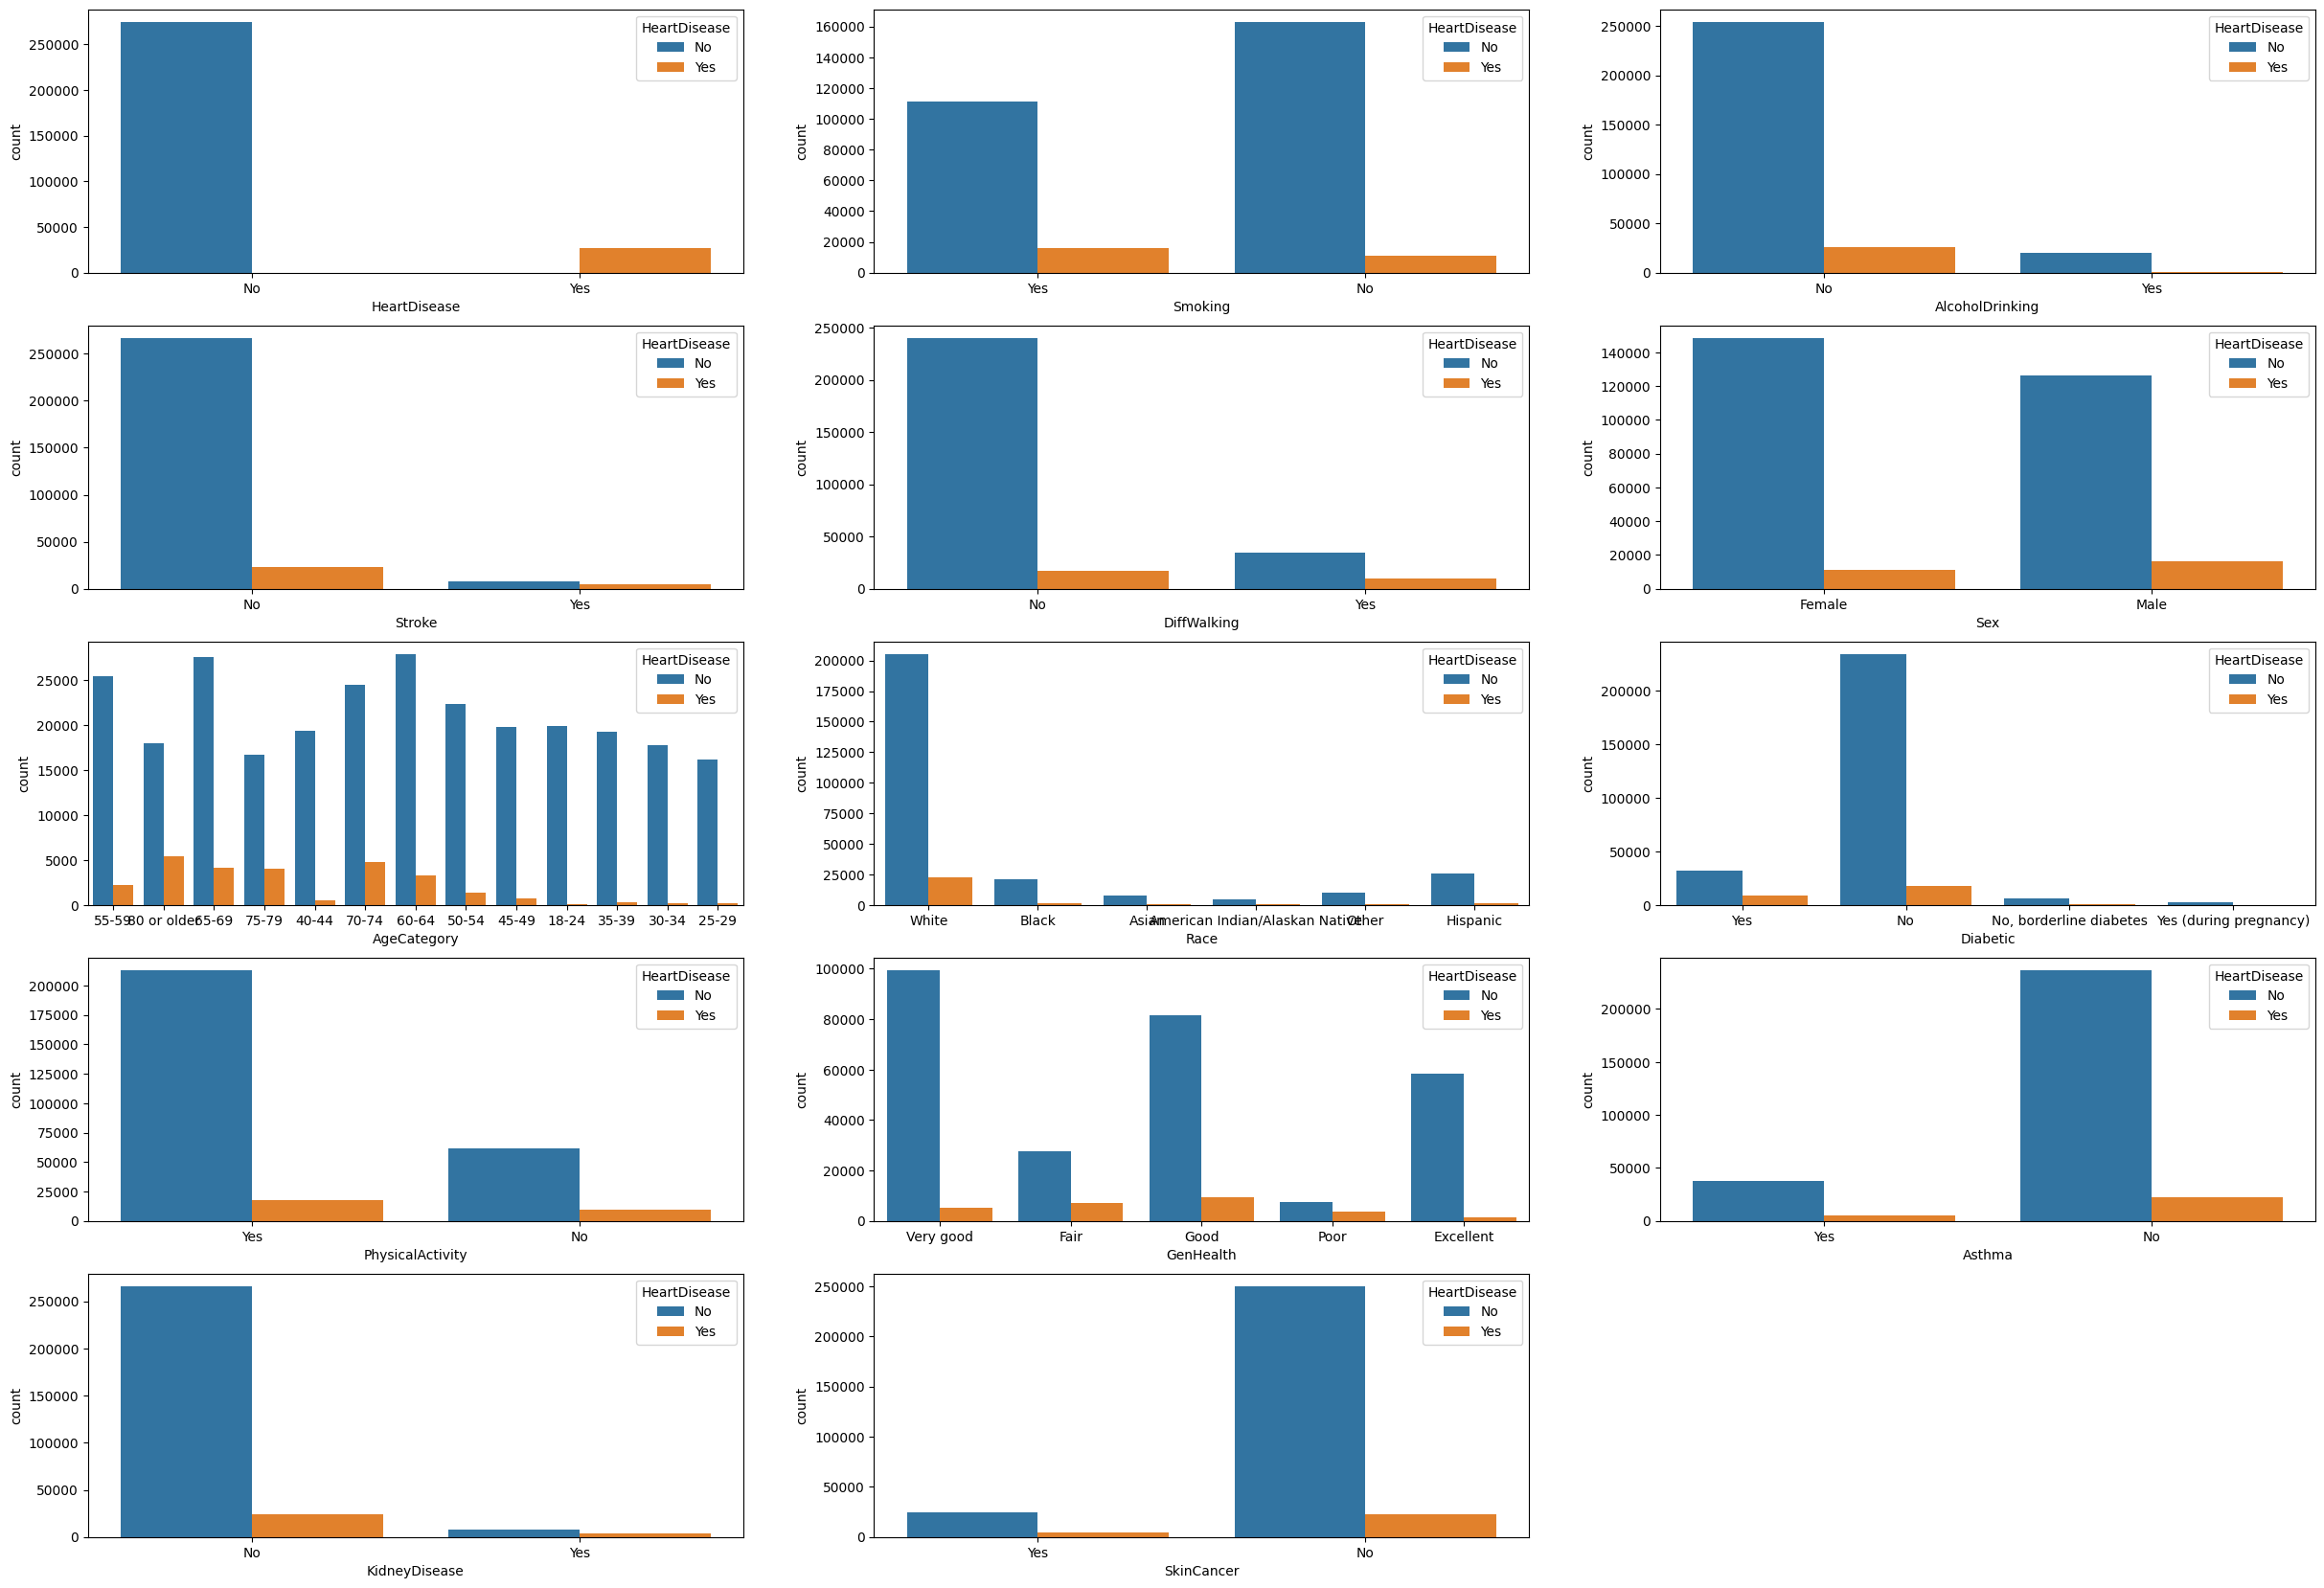

In [18]:

categorical_features = heart_df.select_dtypes(include=[object])

categorical_features.columns

i = 1
plt.figure(figsize = (30,25))
for feature in categorical_features:
    plt.subplot(6,3,i)
    sns.countplot(x = feature,hue = 'HeartDisease' , data = heart_df)
    i +=1

In [34]:
#From the plot we can observe that:
#Smokers are having higher chances of 
#Male are more prone to suffer from heart diseases as compared to females.
#person with low physical activity are more prone towards heart disease.
#person with kidney disease are more prone towards heart disease.
#People with age limit in between 55-75 has higher chances of getting heart diseases.
#person who have strokes alreday are tends toward heartDisease.
#person with skin cancer are more likely to have a heart disease.
#person with poor health are like to have heart disease
#Whites are more prone to heart disease
#Person with diffuclt in walking are likely to have more heart disease.
#Person with asthma are more vulnerable to heart disease.
#Dibatic per are more likely to have a heart disease.
#If person has difficulty in walking or climbing stairs there is a high probability that he or she is suffering from some heart disease.
#the person who drinks alcohol are less prone to heart disease

### 9. Check the unique categories in the column 'Diabetic'. Replace 'Yes (during pregnancy)' as 'Yes' and 'No, borderline diabetes' as 'No'.

In [19]:
value_counts = heart_df['Diabetic'].value_counts()
heart_df['Diabetic'] = heart_df['Diabetic'].replace('Yes (during pregnancy)', 'Yes')
heart_df['Diabetic'] = heart_df['Diabetic'].replace('No, borderline diabetes', 'No')
value_counts = heart_df['Diabetic'].value_counts()
print(value_counts)

No     258572
Yes     43145
Name: Diabetic, dtype: int64


### 10. For the target column 'HeartDiease', Replace 'No' as 0 and 'Yes' as 1. 

In [20]:
heart_df['HeartDisease'] = heart_df['HeartDisease'].replace('Yes', 1)
heart_df['HeartDisease'] = heart_df['HeartDisease'].replace('No', 0)
heart_df['Diabetic'].value_counts()

No     258572
Yes     43145
Name: Diabetic, dtype: int64

### 11. Label Encode the columns "AgeCategory", "Race", and "GenHealth". Encode the rest of the columns using dummy encoding approach.

In [21]:
from sklearn.preprocessing import LabelEncoder

object_type_variables = [i for i in heart_df[['AgeCategory','Race','GenHealth']] if heart_df.dtypes[i] == object]
object_type_variables 


le = LabelEncoder()

def encoder(df):
    for i in object_type_variables:
        q = le.fit_transform(df[i].astype(str))  
        df[i] = q                               
        df[i] = df[i].astype(int)
encoder(heart_df)

In [22]:
heart_df = pd.get_dummies(heart_df,drop_first=True)

In [23]:
heart_df

,HeartDisease,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,GenHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,Diabetic_Yes,PhysicalActivity_Yes,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,0,16.60,3.0,30.0,7,5,4,5.0,1,0,0,0,0,1,1,1,0,1
1,0,20.34,0.0,0.0,12,5,4,7.0,0,0,1,0,0,0,1,0,0,0
2,0,26.58,20.0,30.0,9,5,1,8.0,1,0,0,0,1,1,1,1,0,0
3,0,24.21,0.0,0.0,11,5,2,6.0,0,0,0,0,0,0,0,0,0,1
4,0,23.71,28.0,0.0,4,5,4,8.0,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,7.0,0.0,8,3,1,6.0,1,0,0,1,1,1,0,1,0,0
319791,0,29.84,0.0,0.0,3,3,4,5.0,1,0,0,0,1,0,1,1,0,0
319792,0,24.24,0.0,0.0,5,3,2,6.0,0,0,0,0,0,0,1,0,0,0
319793,0,32.81,0.0,0.0,1,3,2,12.0,0,0,0,0,0,0,0,0,0,0


### 12. Store the target column (i.e.'HeartDisease') in the y variable and the rest of the columns in the X variable.

In [24]:
X = heart_df.drop('HeartDisease',axis=1)
y = heart_df['HeartDisease']

### 13. Split the dataset into two parts (i.e. 70% train and 30% test) and print the shape of the train and test data

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(211201, 17) (90516, 17)
(211201,) (90516,)


### 14. Standardize the numerical columns using Standard Scalar approach for both train and test data.

In [26]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

X_train.iloc[:,:7] = ss.fit_transform(X_train.iloc[:,:7])
X_test.iloc[:,:7] = ss.transform(X_test.iloc[:,:7])

### 15. Write a function.
- i) Which can take the model and data as inputs.
- ii) Fits the model with the train data.
- iii) Makes predictions on the test set.
- iv) Returns the Accuracy Score.

In [27]:
def fit_n_print(model, X_train, X_test, y_train, y_test):  # take the model, and data as inputs

    model.fit(X_train, y_train)   # fits the model with the train data

    pred = model.predict(X_test)  # makes predictions on the test set

    accuracy = accuracy_score(y_test, pred)
                   
    return accuracy  

### 16. Use the function and train a Logistic regression, KNN, Naive Bayes, Decision tree, Random Forest, Adaboost, GradientBoost, and Stacked Classifier models and make predictions on test data and evaluate the models, compare and write your conclusions and steps to be taken in future in order to improve the accuracy of the model.

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier






lr = LogisticRegression()
nb = GaussianNB()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
adb = AdaBoostClassifier()
gb = GradientBoostingClassifier()

estimators = [('rf', rf),('knn', knn), ('gb', gb), ('adb', adb)]
sc = StackingClassifier(estimators=estimators, final_estimator=rf)


In [30]:

from sklearn.metrics import accuracy_score
import pandas as pd 
result = pd.DataFrame(columns = ['Accuracy'])

for model, model_name in zip([lr, nb, knn, dt, rf, adb, gb, sc], 
                             ['Logistic Regression','Naive Bayes','KNN','Decision tree', 
                              'Random Forest', 'Ada Boost', 'Gradient Boost', 'Stacking']):
    
    result.loc[model_name] = fit_n_print(model, X_train, X_test, y_train, y_test)

In [31]:
result

,Accuracy
Logistic Regression,0.911717
Naive Bayes,0.840249
KNN,0.902371
Decision tree,0.855749
Random Forest,0.900924
Ada Boost,0.912546
Gradient Boost,0.913054
Stacking,0.907884


### Conclusion

----
## Happy Learning:)
----